In [1]:
import numpy as np
import pandas as pd
from datetime import datetime


gps=pd.read_csv("googleplaystore.csv")
gps.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
gps['Rating'] = gps['Rating'].astype(str).astype(float)

In [3]:
gps = gps[gps['Installs'] != 'Free']
gps = gps[gps['Installs'] != 'Paid']
gps['Installs'] = gps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
gps['Installs'] = gps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
gps['Installs'] = gps['Installs'].apply(lambda x: int(x))
gps.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
gps['Price'] = gps['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
gps['Price'] = gps['Price'].apply(lambda x: str(x).replace('Everyone', 'NaN') if 'Everyone' in str(x) else str(x))
gps['Price'] = gps['Price'].apply(lambda x: float(x))

In [5]:
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace('+', 'k') if '+' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: float(x))

In [6]:
pd.to_datetime(gps['Last Updated'])

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
6       2018-04-26
7       2018-06-14
8       2017-09-20
9       2018-07-03
10      2017-10-27
11      2018-07-31
12      2018-04-02
13      2018-06-26
14      2018-08-03
15      2018-06-06
16      2018-07-31
17      2017-11-07
18      2018-08-03
19      2018-07-30
20      2018-04-20
21      2018-03-20
22      2018-07-12
23      2018-03-07
24      2018-07-07
25      2018-04-25
26      2017-10-11
27      2018-03-21
28      2018-07-12
29      2017-08-22
           ...    
10811   2018-07-24
10812   2018-06-13
10813   2018-07-17
10814   2015-06-03
10815   2018-07-19
10816   2018-08-06
10817   2015-10-30
10818   2016-05-19
10819   2017-08-05
10820   2018-06-27
10821   2018-05-29
10822   2017-12-01
10823   2018-04-22
10824   2018-07-31
10825   2018-02-02
10826   2018-03-23
10827   2018-06-13
10828   2017-05-15
10829   2016-06-19
10830   2014-01-20
10831   2018-06-13
10832   2014

In [7]:
gps['Android Ver'] = gps['Android Ver'].apply(lambda x: str(x).replace('and up', '') if 'and up' in str(x) else str(x))

In [8]:
gps['Current Ver'] = gps['Current Ver'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [9]:
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
#gps_num1=gps['Rating']
x=gps['Rating'].values.reshape(-1, 1)
imputer=Imputer(strategy='median')
imputer.fit(x)
gps['Rating'] = imputer.transform(x)

C:\Users\shrid\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
gps['Rating'].isnull().sum()

0

In [12]:
y=gps['Size'].values.reshape(-1, 1)
imputer=Imputer(strategy='median')
imputer.fit(y)
gps['Size'] = imputer.transform(y)

C:\Users\shrid\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
gps['Size'].isnull().sum()

0

In [14]:
gps_new = gps.dropna(axis = 0, how ='any')

In [15]:
gps_new.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelBinarizer
columns=['Category','Type','Content Rating']
gps_new=pd.get_dummies(gps_new,columns=columns)

In [17]:
gps_new.head()

,App,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3,...,0,0,1,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14.0,500000,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3,...,0,0,1,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3,...,0,0,1,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,Art & Design,"June 8, 2018",NaN,4.2,...,0,0,1,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4,...,0,0,1,0,0,1,0,0,0,0


In [18]:
corr_matrix=gps_new.corr()
corr_matrix['Installs'].sort_values(ascending=False)

Installs                          1.000000
Category_COMMUNICATION            0.155887
Category_SOCIAL                   0.063378
Category_GAME                     0.061380
Content Rating_Teen               0.055240
Type_Free                         0.051013
Size                              0.047596
Rating                            0.045477
Category_PRODUCTIVITY             0.042612
Content Rating_Everyone 10+       0.038778
Category_PHOTOGRAPHY              0.030743
Category_VIDEO_PLAYERS            0.030248
Category_NEWS_AND_MAGAZINES       0.021205
Category_TRAVEL_AND_LOCAL         0.020470
Category_ENTERTAINMENT            0.005247
Content Rating_Unrated           -0.002469
Content Rating_Adults only 18+   -0.002898
Category_SHOPPING                -0.005504
Category_TOOLS                   -0.006343
Category_WEATHER                 -0.010557
Content Rating_Mature 17+        -0.011383
Price                            -0.011697
Category_ART_AND_DESIGN          -0.012268
Category_BO

In [19]:
gps_new['Current Ver'] = gps_new['Current Ver'].astype('str')
gps_new['Android Ver'] = gps_new['Android Ver'].astype('str')

In [20]:
gps_new.dtypes

App                                object
Rating                            float64
Reviews                            object
Size                              float64
Installs                            int64
Price                             float64
Genres                             object
Last Updated                       object
Current Ver                        object
Android Ver                        object
Category_ART_AND_DESIGN             uint8
Category_AUTO_AND_VEHICLES          uint8
Category_BEAUTY                     uint8
Category_BOOKS_AND_REFERENCE        uint8
Category_BUSINESS                   uint8
Category_COMICS                     uint8
Category_COMMUNICATION              uint8
Category_DATING                     uint8
Category_EDUCATION                  uint8
Category_ENTERTAINMENT              uint8
Category_EVENTS                     uint8
Category_FAMILY                     uint8
Category_FINANCE                    uint8
Category_FOOD_AND_DRINK           

In [21]:
gps_new['Reviews'] = gps_new.Reviews.astype(float)

In [22]:
gps_new.dtypes

App                                object
Rating                            float64
Reviews                           float64
Size                              float64
Installs                            int64
Price                             float64
Genres                             object
Last Updated                       object
Current Ver                        object
Android Ver                        object
Category_ART_AND_DESIGN             uint8
Category_AUTO_AND_VEHICLES          uint8
Category_BEAUTY                     uint8
Category_BOOKS_AND_REFERENCE        uint8
Category_BUSINESS                   uint8
Category_COMICS                     uint8
Category_COMMUNICATION              uint8
Category_DATING                     uint8
Category_EDUCATION                  uint8
Category_ENTERTAINMENT              uint8
Category_EVENTS                     uint8
Category_FAMILY                     uint8
Category_FINANCE                    uint8
Category_FOOD_AND_DRINK           

In [23]:
gps_new= gps_new.drop('Current Ver', 1)
gps_new= gps_new.drop('Android Ver', 1)
gps_new=gps_new.drop('Last Updated',1)

In [24]:
gps_new=gps_new.drop('Genres',1)
gps_new.dtypes

App                                object
Rating                            float64
Reviews                           float64
Size                              float64
Installs                            int64
Price                             float64
Category_ART_AND_DESIGN             uint8
Category_AUTO_AND_VEHICLES          uint8
Category_BEAUTY                     uint8
Category_BOOKS_AND_REFERENCE        uint8
Category_BUSINESS                   uint8
Category_COMICS                     uint8
Category_COMMUNICATION              uint8
Category_DATING                     uint8
Category_EDUCATION                  uint8
Category_ENTERTAINMENT              uint8
Category_EVENTS                     uint8
Category_FAMILY                     uint8
Category_FINANCE                    uint8
Category_FOOD_AND_DRINK             uint8
Category_GAME                       uint8
Category_HEALTH_AND_FITNESS         uint8
Category_HOUSE_AND_HOME             uint8
Category_LIBRARIES_AND_DEMO       

In [25]:
df1 = gps_new.pop('Rating')
gps_new['Rating']=df1
gps_new.head()

,App,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,159.0,19.0,10000,0.0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.1
1,Coloring book moana,967.0,14.0,500000,0.0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510.0,8.7,5000000,0.0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.7
3,Sketch - Draw & Paint,215644.0,25.0,50000000,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4.5
4,Pixel Draw - Number Art Coloring Book,967.0,2.8,100000,0.0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.3


In [26]:
from sklearn import preprocessing
x=gps_new.iloc[:,2:44]
x.head()

,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+
0,19.0,10000,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,14.0,500000,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,8.7,5000000,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,25.0,50000000,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.8,100000,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [27]:
tar=gps_new['Rating']
tar.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, tar, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(8664, 42) (8664,)
(2167, 42) (2167,)


In [29]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)
pred1=rf.predict(X_train)
pred=rf.predict(X_test)

In [30]:
#finding absolute errors
errors = abs(pred - y_test)
errors1=abs(pred1- y_train)
#finding mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'degrees.')
mape=100*(errors/y_test)
#calculate and display accuracy 
accuracy=100-np.mean(mape)
print('Accuracy:',round(accuracy,2),'%.')

Mean Absolute Error: 0.32 degrees.
Mean Absolute Error: 0.15 degrees.
Accuracy: 91.03 %.


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
#Predict values
pred2=lr.predict(X_train)
pred3=lr.predict(X_test)

#Ridge Regression
#train_score=lr.score(X_train, y_train)
#Ridge_train_score = rr.score(X_train,y_train)
#print(train_score)
#print(Ridge_train_score)
#Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
pred4=rr.predict(X_train)
pred5=rr.predict(X_test)

C:\Users\shrid\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.586953e-22
  overwrite_a=True).T


In [34]:
#finding absolute errors for linear regression
errors = abs(pred2 - y_train)
errors1=abs(pred3- y_test)
#finding mean absolute error for linear regression
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'degrees.')

#finding absolute errors for ridge regression
errors = abs(pred4 - y_train)
errors1=abs(pred5- y_test)
#finding mean absolute error for ridge regression
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'degrees.')

Mean Absolute Error: 0.32 degrees.
Mean Absolute Error: 0.33 degrees.
Mean Absolute Error: 0.32 degrees.
Mean Absolute Error: 0.33 degrees.


In [35]:
df2 = gps_new.pop('Price')
gps_new['Price']=df2
gps_new.head()
from sklearn import preprocessing
x=gps_new.iloc[:,1:46]
x.head()

,Reviews,Size,Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating
0,159.0,19.0,10000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.1
1,967.0,14.0,500000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,3.9
2,87510.0,8.7,5000000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.7
3,215644.0,25.0,50000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4.5
4,967.0,2.8,100000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,4.3


In [36]:
tar=gps_new['Price']
tar.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, tar, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8664, 45) (8664,)
(2167, 45) (2167,)


In [40]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)
pred1=rf.predict(X_train)
pred=rf.predict(X_test)

In [41]:
#finding absolute errors
errors = abs(pred - y_test)
errors1=abs(pred1- y_train)
#finding mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'degrees.')
mape=100*(errors/y_test)
#calculate and display accuracy 
accuracy=100-np.mean(mape)
print('Accuracy:',round(accuracy,2),'%.')

Mean Absolute Error: 1.06 degrees.
Mean Absolute Error: 0.38 degrees.
Accuracy: -inf %.


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
#Ridge regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

C:\Users\shrid\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.581134e-22
  overwrite_a=True).T


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
#Linear Regression
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print(train_score)
print(test_score)

0.06167248582209295
0.07157213277594465


In [46]:
#Ridge Regression
train_score=rr.score(X_train, y_train)
test_score=rr.score(X_test, y_test)
print(train_score)
print(test_score)

0.061672485797531595
0.0715715358875959


In [47]:
gps_new['converted_Installs'] = np.where(gps_new['Installs']>250000,'a','b');
tar=gps_new['converted_Installs']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, tar, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8664, 45) (8664,)
(2167, 45) (2167,)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1029    0]
 [   0 1138]]
              precision    recall  f1-score   support

           a       1.00      1.00      1.00      1029
           b       1.00      1.00      1.00      1138

   micro avg       1.00      1.00      1.00      2167
   macro avg       1.00      1.00      1.00      2167
weighted avg       1.00      1.00      1.00      2167



In [50]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  

In [51]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1029    0]
 [   0 1138]]
              precision    recall  f1-score   support

           a       1.00      1.00      1.00      1029
           b       1.00      1.00      1.00      1138

   micro avg       1.00      1.00      1.00      2167
   macro avg       1.00      1.00      1.00      2167
weighted avg       1.00      1.00      1.00      2167



In [52]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
rf = RandomForestClassifier(n_estimators=100, max_depth=2,
                           random_state=0)
rf.fit(X_train,y_train)
pred1=rf.predict(X_train)
pred=rf.predict(X_test)

In [53]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1026    3]
 [   1 1137]]
              precision    recall  f1-score   support

           a       1.00      1.00      1.00      1029
           b       1.00      1.00      1.00      1138

   micro avg       1.00      1.00      1.00      2167
   macro avg       1.00      1.00      1.00      2167
weighted avg       1.00      1.00      1.00      2167



excess kurtosis of  distribution : 7.292193536103111
skewness of distribution: -2.0623919669267807


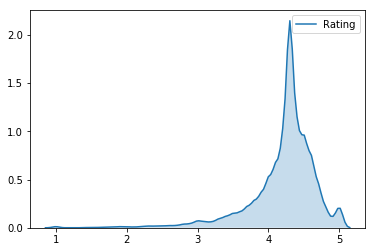

In [60]:
# descriptive analysis on play store

import seaborn as sns
sns.kdeplot(shade=True,data=gps_new['Rating'])

from scipy.stats import kurtosis, skew

x = np.random.normal(0, 2, 10000)
print( 'excess kurtosis of  distribution : {}'.format( kurtosis(gps_new['Rating']) ))
print( 'skewness of distribution: {}'.format( skew(gps_new['Rating']) ))

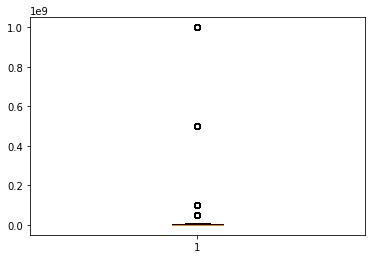

In [70]:
import matplotlib.pyplot as plt
#fig=plt.figure()
plt.boxplot(gps_new['Installs'])
plt.show()

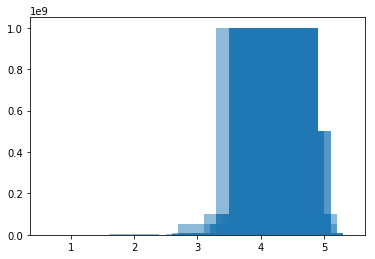

In [72]:
x=gps_new['Installs']
y=gps_new['Rating']
plt.bar(y,x,alpha=0.5)
plt.show()

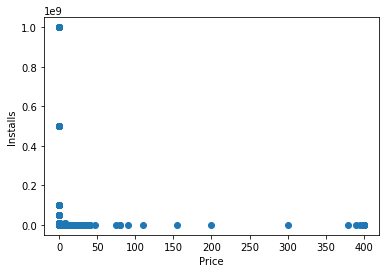

In [77]:
a=gps_new['Price']
b=gps_new['Installs']
plt.scatter(a,b)
plt.xlabel('Price')
plt.ylabel('Installs')
plt.show()